In [1]:
import math

import torch

from src.oscillators import HopfOscillatorCfg, HopfOscillator
from src.utils import make_coupling_bias_matrix, make_coupling_weight_matrix

In [2]:
hopf_oscillator = HopfOscillator(
    cfg=HopfOscillatorCfg(
        init_state=HopfOscillatorCfg.InitialStateCfg(
            beta=(0, math.pi, math.pi, 0, 0, math.pi)
        ),
        dt=0.005,
        mu=150,
    ),
    device="cpu",
)

In [3]:
coupling_bias = make_coupling_bias_matrix(hopf_oscillator.data.default_state.beta)
coupling_weight = make_coupling_weight_matrix(coupling_bias)

In [4]:
n_timesteps = 1000

r_hist = torch.empty(size=(n_timesteps, len(hopf_oscillator.cfg.init_state.beta)))
delta_r_hist = torch.empty_like(r_hist)
theta_hist = torch.empty_like(r_hist)
delta_theta_hist = torch.empty_like(r_hist)

In [5]:
r_cmd = torch.rand_like(r_hist[0]) * 3
delta_theta_cmd = torch.rand_like(r_hist[0]) * 4 * math.pi
delta_theta_max = torch.tensor(math.pi)

for i in range(n_timesteps):
    hopf_oscillator_data = hopf_oscillator.step(
        r_cmd, delta_theta_cmd, delta_theta_max, coupling_bias, coupling_weight
    )

    r_hist[i] = hopf_oscillator.data.r.detach()
    delta_r_hist[i] = hopf_oscillator.data.delta_r.detach()
    theta_hist[i] = hopf_oscillator.data.theta.detach()
    delta_theta_hist[i] = hopf_oscillator.data.delta_theta.detach()

In [6]:
import matplotlib.pyplot as plt

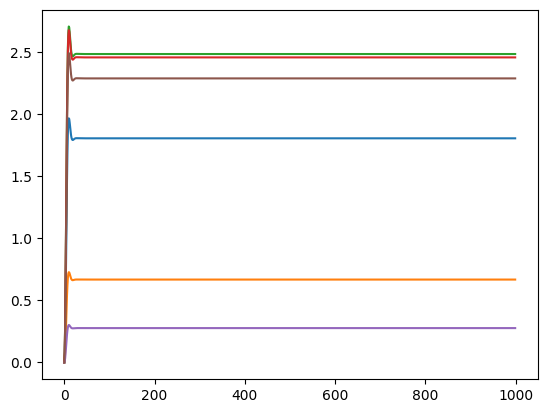

In [7]:
plt.plot(r_hist)
plt.show()

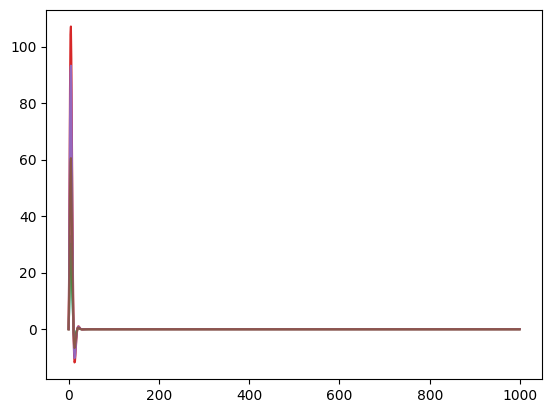

In [7]:
plt.plot(delta_r_hist)
plt.show()

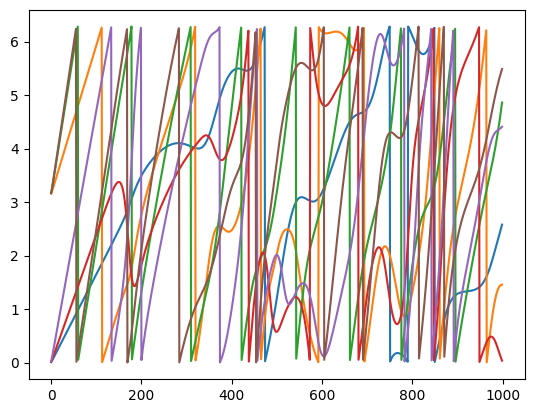

In [8]:
plt.plot(theta_hist)
plt.show()

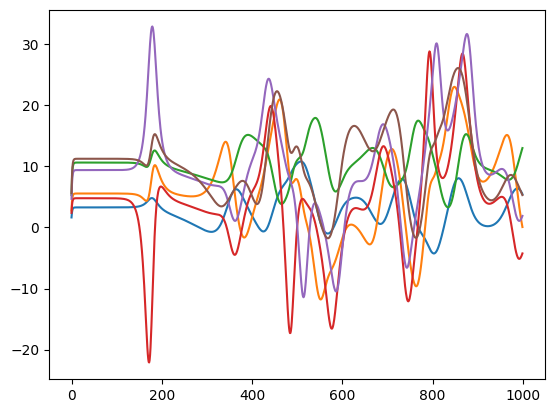

In [9]:
plt.plot(delta_theta_hist)
plt.show()

In [10]:
print(hopf_oscillator.data)
hopf_oscillator.reset()
print(hopf_oscillator.data)

HopfOscillatorData(default_state=HopfOscillatorData.DefaultStateCfg(beta=tensor([0.0000, 3.1416, 3.1416, 0.0000, 0.0000, 3.1416])), r=tensor([0.8928, 1.8737, 0.8185, 2.9003, 2.5244, 1.6386]), delta_r=tensor([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.7881e-05, 0.0000e+00]), v=tensor([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.7881e-05, 0.0000e+00]), delta_v=tensor([0., 0., 0., 0., 0., 0.]), alpha=tensor([2.3189, 1.1301, 1.3358, 3.5483, 1.4497, 4.4421]), delta_alpha=tensor([1.7221, 3.9999, 9.0727, 3.2262, 7.8376, 9.6946]), beta=tensor([0.2591, 0.3248, 3.5258, 2.7698, 2.9577, 1.0440]), delta_beta=tensor([ 3.7379, -3.9250,  3.9432, -7.4767, -5.9392, -4.3819]))
HopfOscillatorData(default_state=HopfOscillatorData.DefaultStateCfg(beta=tensor([0.0000, 3.1416, 3.1416, 0.0000, 0.0000, 3.1416])), r=tensor([0., 0., 0., 0., 0., 0.]), delta_r=tensor([0., 0., 0., 0., 0., 0.]), v=tensor([0., 0., 0., 0., 0., 0.]), delta_v=tensor([0., 0., 0., 0., 0., 0.]), alpha=tensor([0., 0., 0., 0., 0.